# Final Project Submission

Please fill out:
* Student name: Maryam Ghaffari
* Student pace: Part time 
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:

# Overview

The COVID-19 pandemic is a global outbreak of a new coronavirus that is very different from current and recently circulating human seasonal influenza viruses. Vaccines are a critical public health measure to fight infectious diseases like COVID-19. They provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity." As the world struggles to vaccinate the global population against COVID-19, understanding how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts.


# Problem Statement & Mission

Vaccines for H1N1 were first publicly available in the United States in October 2009, when the United States government began a vaccination campaign. U.S. Department of Health & Human Services collected the national 2009 H1N1 Flu Survey data to monitor vaccination rates during that campaign. This phone survey asked people whether they had received H1N1 and seasonal flu vaccines, in conjunction with the information they shared about their lives, opinions, and behaviors. U.S. Department of Health & Human Services has commissioned us to predict whether people got H1N1 and seasonal flu vaccines using data collected in the National 2009 H1N1 Flu Survey. My task is to provide accurate predictions for the people who receive the seasonal vaccine or not. I will conduct this task by doing data wrangling on the Flu Survey data and generating classification models which predict with high accuracy whether the survey respondent received the seasonal flu vaccine. Asking the right data analysis questions is crucial for getting accurate, actionable insights from the data analytics. In this project we answer to two main questions: 

- What is the relationship between demographic information and receiving vaccine?
- How doctor recommendation effects on peoples opininon to recive the vaccine? and which age group , sex, and race have been more affected?



#  Evaluation Metrics

My model will be a binary classifier, meaning that there are two potential classes (receiving and not receiving vaccines) that can be placed. If our model incorrectly predicts a receiving vaccine's state, I am more concerned with false positives than false negatives. Models that predict that some people are vaccinated while others do not may expose communities to the risk of low vaccination coverage. However, if the model predicted that people would not be vaccinated while they vaccinated, the health system would allocate resources to problems that do not currently exist, and those resources could be used for another segment of society. Therefore, for the purposes of this work, a low false-positive rate has more value than a low false-negative rate. Precision and Recall are two of the most basic evaluation metrics available to us. Precision is one of the most basic evaluation metrics to quantify the performance of classifiers when False Positives are more costly than False Negatives. Precision measures how precise the predictions are, while Recall indicates what percentage of the classes we're interested in was actually captured by the model (True Positive Rate). On the other hand, accuracy is the most common metric for classification that Provides a complete picture of the model's overall performance. These evaluation metrics are defined as


$$ \text{Accuracy} = \frac{\text{Number of True Positives + Number of True Negative}}{\text{Total Number of Predictions}} $$

  



$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$




$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$

$$\text{Metric}$$ | $$\text{Formola} $$ 
:---------|:-------------
$$\text{Accuracy}$$ | $$\frac{\text{Number of True Positives + Number of True Negative}}{\text{Total Observation}}$$
$$\text{Precision}$$| $$\frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$$
$$\text{Recall}$$ | $$\frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$$
$$\text{F1}$$ | $$2\frac{\text{Precision x Recall}}{\text{Precision + Recall}}$$

# Methodology

The general research strategy in this project is to use the OSEMN framework on the King County House Sales dataset. The process includes the below steps:

 - Obtain data
 - Scrub
 - Explore
 - Model
 - iNterpret

# Obtain Data

The very first step of the project is to obtain data. We obtain the data from We will look at data from the National 2009 H1N1 Flu Survey collected to monitor vaccination rates during that campaign. Obtaining data starts with importing needed libraries.

In [1]:
#Importing the libraries used throughout the project
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  

import os

#Add plots to Jupyter noteboos
%matplotlib inline

# Suppress certain warning messages created from the output of 'iffy' commands
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 100)

At first, we should check our datasets and decide how to clean the data. We have 4 datasets:
1. training_set_features.csv
2. training_set_labels.csv
3. submission_format.csv
4. test_set_features.csv

Through .info() and .head() methods we can have a general idea about this dataframe. In addition with .isnull() and .duplicated() methods, we can decide on better selection.

In [2]:
labels_df = pd.read_csv('training_set_labels.csv',index_col = 'respondent_id')
print(labels_df.info())
labels_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB
None


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


According to the `.info()`, 'labels_df' does not have missing values so we go further for the next step. Since I just need the 'seasonal_vaccine' column, I drop the 'h1n1_vaccine' column.

In [3]:
labels_df = labels_df.drop('h1n1_vaccine', axis = 1)
labels_df.head()

,seasonal_vaccine
respondent_id,
0,0
1,1
2,0
3,1
4,0


In [4]:
# Import 'training_set_features.csv' dataset
features_df = pd.read_csv('training_set_features.csv',index_col = 'respondent_id')
print (features_df.info())
features_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
features_df['opinion_seas_sick_from_vacc'].unique()

array([ 2.,  4.,  1.,  5., nan,  3.])

In [6]:
features_df['age_group'].value_counts(dropna=False)

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

# Scrub Data

To begin with the dataframe we should fix bad data in the data set. The first step to cleaning a dataframe is to deal with the type of data, missing and duplicated values because they might cause mislead in results. To obtain a general view of the data we can check the type of data with the `.info()` method and we can have statistics of our numeric columns with the `.describe()` method.

In [7]:
# Return unique values of Series object.
features_df ['income_poverty'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [8]:
#Return a Series containing counts of unique values.
features_df ['income_poverty'].value_counts(dropna=False)

<= $75,000, Above Poverty    12777
> $75,000                     6810
NaN                           4423
Below Poverty                 2697
Name: income_poverty, dtype: int64

Numpy's `.testing.assert_array_equal` was used to check rows between features and labels match up.

In [9]:
# Raises an AssertionError if two array_like objects are not equal.
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [10]:
# Indicat the sum of duplicated rows
features_df.duplicated().sum()

0

In [11]:
#Detect missing values for an array-like object
features_df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [12]:
# Measure the percentage of missing value
percent_missing = features_df.isnull().sum() * 100 / len(features_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
h1n1_concern,0.344479
h1n1_knowledge,0.434343
behavioral_antiviral_meds,0.265848
behavioral_avoidance,0.778822
behavioral_face_mask,0.071142
behavioral_wash_hands,0.157262
behavioral_large_gatherings,0.325757
behavioral_outside_home,0.307036
behavioral_touch_face,0.479275
doctor_recc_h1n1,8.087767


Some columns are missing more than half the values, so the best practice for those columns is to simply remove them from the dataframe. Since the health_insurance', 'income_poverty', 'employment_industry', and 'employment_occupation' columns have several missing values, I dropped these columns. Also, I will drop the columns in regard to H1NI like 'h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc'.  Because I want to work on the survey respondent who received the seasonal flu vaccine.

In [13]:
# Drop columns
features_df = features_df.drop (['health_insurance','income_poverty','employment_industry', 'employment_occupation',
'h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
'opinion_h1n1_sick_from_vacc'],axis =1)
features_df.shape

(26707, 25)

In [14]:
# Measture the percentage of missing value
percent_missing = features_df.isnull().sum() * 100 / len(features_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
behavioral_antiviral_meds,0.265848
behavioral_avoidance,0.778822
behavioral_face_mask,0.071142
behavioral_wash_hands,0.157262
behavioral_large_gatherings,0.325757
behavioral_outside_home,0.307036
behavioral_touch_face,0.479275
doctor_recc_seasonal,8.087767
chronic_med_condition,3.635751
child_under_6_months,3.070356


Generally, if less than 10% of values are missing then it is acceptable to ignore them. So, I dropped null values.

In [15]:
# Drop the null values
features_df = features_df.dropna()

In [16]:
# Check the null values
features_df.isnull().sum()

behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
dtype: int64

Now dataframs are clean and to go further for the next step. Lets joined the dataframes.

In [17]:
# Join two dataframes
joined_df = features_df.join(labels_df)
joined_df.shape


(21876, 26)

In [18]:
# Return the count of placeholder values
joined_df.isin(['?', '#', 'NaN', 'null', 'N/A', '-']).sum()

behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
seasonal_vaccine               0
dtype: int64

# Explore Data

Now the dataset is clean. Then, we can move to our explore section of the project. In this step, we will gain a much deeper understanding of the distributions of our dataset, and begin to see the various relationships between our features and target variable through visualizations and statistical testing. It is also in the explore stage that we will begin to answer our business case questions. For these purposes, we will conduct an Exploratory Data Analysis (EDA). The below questions might help better to have insight into our database

The dataset is now clean. Then go to the explore section of the project. In this step, we gain a deeper understanding of the dataset and begin to see different relationships between features and target variables through visualization and statistical testing. The explore phase also starts answering questions about the problem. For these purposes, we conduct exploratory data analysis (EDA). The following questions may help us understand our database better. 

### Qustion 1. What is the relationship between demographic information and receiving vaccine?
To answer this question, some demographic information has been categorized based on whether someone has been vaccinated or not. Then the results were plotted.

In [19]:
# Group features
counts = (joined_df[['sex', 'seasonal_vaccine']]
              .groupby(['sex', 'seasonal_vaccine'])
              .size()
              .unstack('sex')
         )
counts

sex,Female,Male
seasonal_vaccine,,
0,6404,4994
1,6702,3776


In [20]:
# Calculation of the total number of the grouped features
sex_counts = counts.sum(axis='columns')
sex_counts

seasonal_vaccine
0    11398
1    10478
dtype: int64

In [21]:
# Calculation of the proportion of the features of the total features
props = counts.div(sex_counts,axis='index')
props

sex,Female,Male
seasonal_vaccine,,
0,0.561853,0.438147
1,0.639626,0.360374


In [22]:
# Define a def to calculate vaccination rate for seasonal_vaccine (`target`) against features ('col')
def vaccination_rate_plot(col, target, data):
    """
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
    """
    counts = (data[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target))
    
    group_counts = counts.sum(axis='columns')
    props = (counts.div(group_counts, axis='index'))*100
    
    ax = props.plot(kind='barh', stacked=True, figsize=(5,3), color=['green', 'gray'], xticks=[])
    ax.legend (labels = ['Unvaccinated','Vaccinated'], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
     
    # remove ticks
    ax.tick_params(left=False, bottom=False)
    # remove all spines
    ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)

    ax.invert_yaxis()  # labels read top-to-bottom
    for c in ax.containers:
    
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_width()) > 0 else '' for v in c]

        # add annotations
        ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w')
    

In [23]:
# Check name of columns
joined_df.columns

Index(['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'household_adults', 'household_children',
       'seasonal_vaccine'],
      dtype='object')

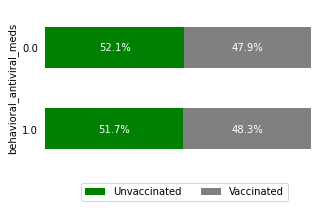

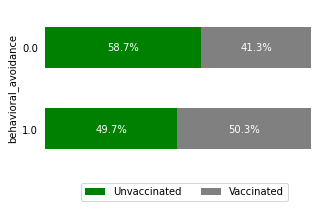

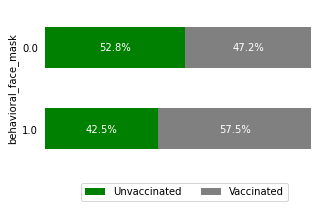

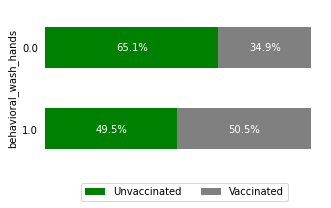

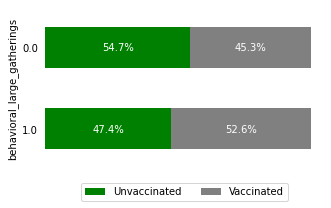

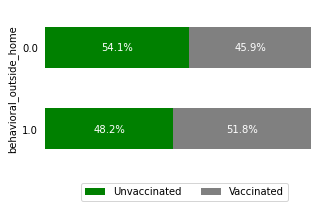

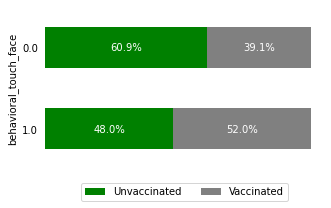

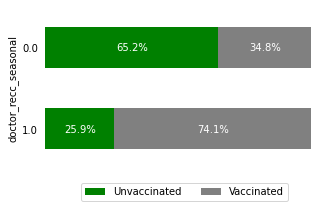

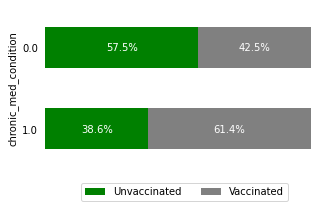

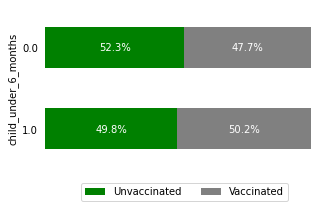

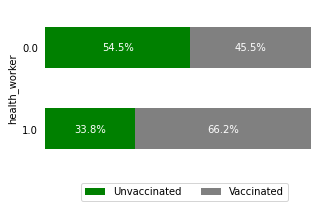

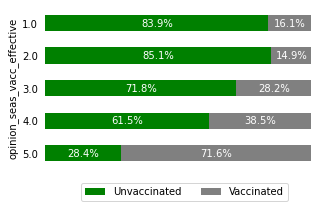

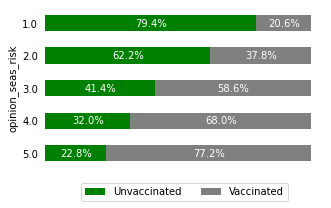

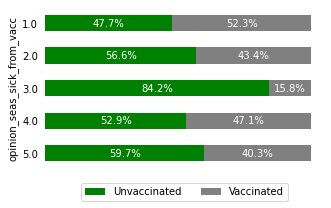

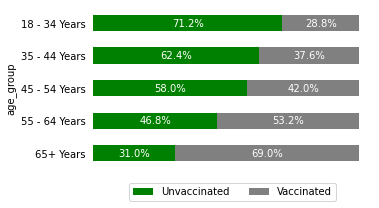

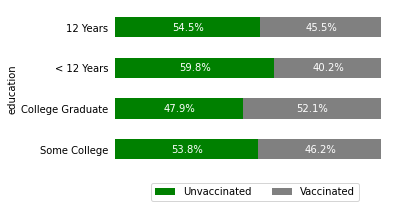

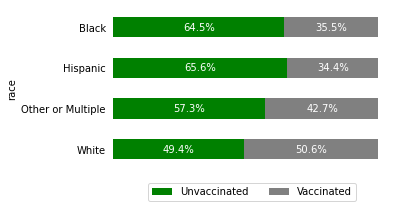

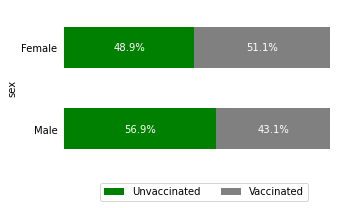

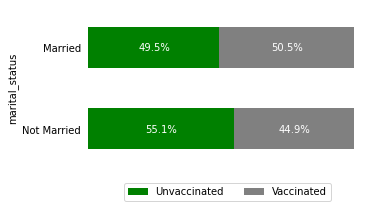

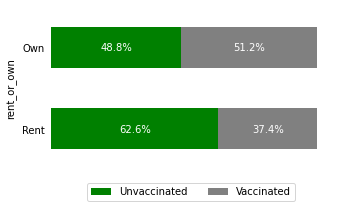

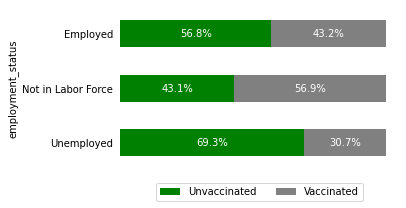

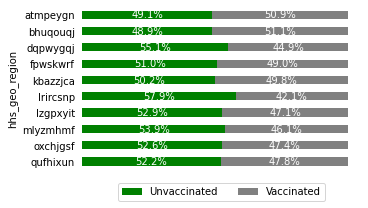

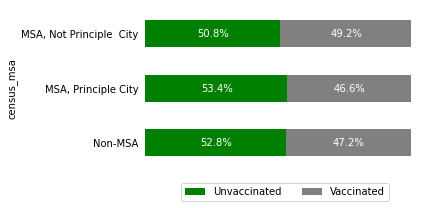

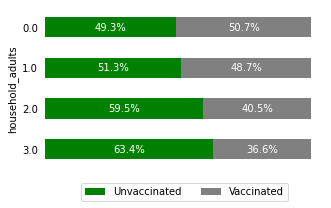

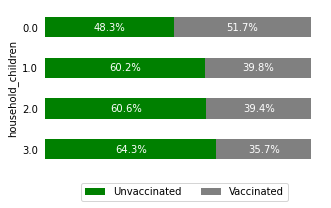

In [24]:
# Plot the chart
cols_to_plot = [
    'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'household_adults', 'household_children'
]



for indx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, 'seasonal_vaccine', joined_df)
    

    
#fig.tight_layout()
plt.show()

Examination of the dataset revealed that several traits were predictive of individual vaccination patterns. For example, gender and marital status did not affect individual vaccination patterns, whereas age, race, education and employment status did. This plot showed demographic features are correlated with vaccination

### Question 2.  How do doctor's recommendations affect people's opinions of vaccination for different age groups, genders, and races?

### Relationship between effectiveness and recommendations

In [26]:
# group features
counts = (joined_df[['opinion_seas_vacc_effective', 'seasonal_vaccine', 'doctor_recc_seasonal']]
              .groupby(['opinion_seas_vacc_effective', 'seasonal_vaccine','doctor_recc_seasonal'])
              .size()
              .unstack('seasonal_vaccine')
         )
counts

seasonal_vaccine                                     0     1
opinion_seas_vacc_effective doctor_recc_seasonal            
1.0                         0.0                    656    86
                            1.0                    135    66
2.0                         0.0                   1320   151
                            1.0                    232   121
3.0                         0.0                    578   164
                            1.0                     52    83
4.0                         0.0                   5107  1930
                            1.0                    925  1842
5.0                         0.0                   1853  2756
                            1.0                    540  3279

In [27]:
# Calculation of the total number of the grouped features
effect_recom = counts.sum(axis='columns')
effect_recom

opinion_seas_vacc_effective  doctor_recc_seasonal
1.0                          0.0                      742
                             1.0                      201
2.0                          0.0                     1471
                             1.0                      353
3.0                          0.0                      742
                             1.0                      135
4.0                          0.0                     7037
                             1.0                     2767
5.0                          0.0                     4609
                             1.0                     3819
dtype: int64

In [28]:
# Calculation of the proportion of the features of the total features
props = counts.div(effect_recom,axis='index')*100
props = props.sort_values('doctor_recc_seasonal')

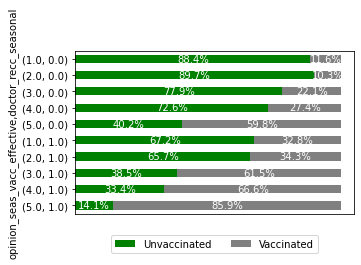

In [29]:
# Plot the chart
ax = props.plot.barh(stacked=True, figsize=(5,3), color=['green', 'gray'], xticks=[])
ax.legend (labels = ['Unvaccinated','Vaccinated'], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax.invert_yaxis()  # labels read top-to-bottom

for c in ax.containers:
    
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_width()) > 0 else '' for v in c]

        # add annotations
        ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w')

### Relationship between risk and recomendation

In [32]:
# # Group features
counts = (joined_df[['opinion_seas_risk', 'seasonal_vaccine', 'doctor_recc_seasonal']]
              .groupby(['opinion_seas_risk', 'seasonal_vaccine','doctor_recc_seasonal'])
              .size()
              .unstack('seasonal_vaccine')
         )
counts

seasonal_vaccine                           0     1
opinion_seas_risk doctor_recc_seasonal            
1.0               0.0                   3378   558
                  1.0                    507   451
2.0               0.0                   3967  1541
                  1.0                    703  1300
3.0               0.0                    153   132
                  1.0                     29   126
4.0               0.0                   1600  2077
                  1.0                    489  2361
5.0               0.0                    416   779
                  1.0                    156  1153

In [33]:
# Calculation of the total number of the grouped features
risk_recom = counts.sum(axis='columns')
risk_recom

opinion_seas_risk  doctor_recc_seasonal
1.0                0.0                     3936
                   1.0                      958
2.0                0.0                     5508
                   1.0                     2003
3.0                0.0                      285
                   1.0                      155
4.0                0.0                     3677
                   1.0                     2850
5.0                0.0                     1195
                   1.0                     1309
dtype: int64

In [34]:
# Calculation of the proportion of the features of the total features
props = counts.div(risk_recom,axis='index')*100
props = props.sort_values('doctor_recc_seasonal')
props 

,seasonal_vaccine,0,1
opinion_seas_risk,doctor_recc_seasonal,,
1.0,0.0,85.823171,14.176829
2.0,0.0,72.022513,27.977487
3.0,0.0,53.684211,46.315789
4.0,0.0,43.513734,56.486266
5.0,0.0,34.811715,65.188285
1.0,1.0,52.922756,47.077244
2.0,1.0,35.097354,64.902646
3.0,1.0,18.709677,81.290323
4.0,1.0,17.157895,82.842105


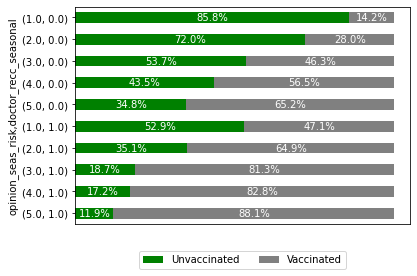

In [35]:
ax = props.plot.barh(stacked=True, color=['green', 'gray'], xticks=[])
ax.legend (labels = ['Unvaccinated','Vaccinated'], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax.invert_yaxis()  # labels read top-to-bottom

for c in ax.containers:
    
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_width()) > 0 else '' for v in c]

        # add annotations
        ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w')

In the chart that shows people's opinion regarding the efficacy of vaccination it can be seen that physician recommendations can change the population's perception of vaccination, even in groups who strongly believed vaccination was not effective. Additionally, doctors may change an individual's opinion about the risks of vaccination.

### Relationship between gender and recomendation

In [38]:
# Group features
counts = (joined_df[['sex', 'seasonal_vaccine', 'doctor_recc_seasonal']]
              .groupby(['sex', 'seasonal_vaccine','doctor_recc_seasonal'])
              .size()
              .unstack('seasonal_vaccine')
         )
counts

seasonal_vaccine                0     1
sex    doctor_recc_seasonal            
Female 0.0                   5185  3162
       1.0                   1219  3540
Male   0.0                   4329  1925
       1.0                    665  1851

In [39]:
# Calculation of the total number of the grouped features
sex_counts = counts.sum(axis='columns')
sex_counts

sex     doctor_recc_seasonal
Female  0.0                     8347
        1.0                     4759
Male    0.0                     6254
        1.0                     2516
dtype: int64

In [40]:
# Calculation of the proportion of the features of the total features
props = counts.div(sex_counts,axis='index')*100
props = props.sort_values('doctor_recc_seasonal')

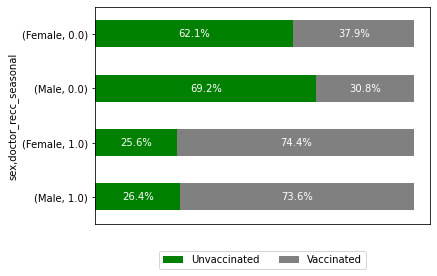

In [42]:
#Plot chart
ax = props.plot.barh(stacked=True, color=['green', 'gray'], xticks=[])
ax.legend (labels = ['Unvaccinated','Vaccinated'], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax.invert_yaxis()  # labels read top-to-bottom

for c in ax.containers:
    
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_width()) > 0 else '' for v in c]

        # add annotations
        ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w')

### Relationship between race and recomendation

In [43]:
 # Group features
counts = (joined_df[['race', 'seasonal_vaccine', 'doctor_recc_seasonal']]
              .groupby(['race', 'seasonal_vaccine','doctor_recc_seasonal'])
              .size()
              .unstack('seasonal_vaccine')
         )
counts

seasonal_vaccine                           0     1
race              doctor_recc_seasonal            
Black             0.0                    836   267
                  1.0                    244   327
Hispanic          0.0                    787   246
                  1.0                    152   247
Other or Multiple 0.0                    596   262
                  1.0                    131   280
White             0.0                   7295  4312
                  1.0                   1357  4537

In [44]:
# Calculation of the total number of the grouped features
race_counts = counts.sum(axis='columns')
race_counts

race               doctor_recc_seasonal
Black              0.0                      1103
                   1.0                       571
Hispanic           0.0                      1033
                   1.0                       399
Other or Multiple  0.0                       858
                   1.0                       411
White              0.0                     11607
                   1.0                      5894
dtype: int64

In [45]:
# Calculation of the proportion of the features of the total features
props = counts.div(race_counts,axis='index')*100
props = props.sort_values('doctor_recc_seasonal')
props

,seasonal_vaccine,0,1
race,doctor_recc_seasonal,,
Black,0.0,75.793291,24.206709
Hispanic,0.0,76.185866,23.814134
Other or Multiple,0.0,69.463869,30.536131
White,0.0,62.850004,37.149996
Black,1.0,42.732049,57.267951
Hispanic,1.0,38.095238,61.904762
Other or Multiple,1.0,31.873479,68.126521
White,1.0,23.023414,76.976586


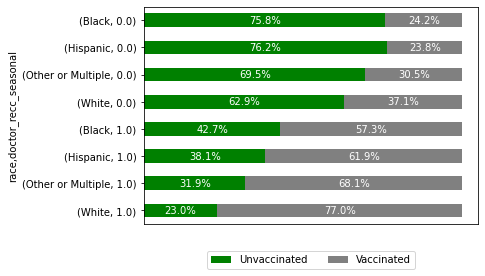

In [47]:
# Plot chart
ax = props.plot.barh(stacked=True, color=['green', 'gray'], xticks=[])
ax.legend (labels = ['Unvaccinated','Vaccinated'], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax.invert_yaxis()  # labels read top-to-bottom

for c in ax.containers:
    
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_width()) > 0 else '' for v in c]

        # add annotations
        ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w')

In [49]:
# Calculate increase percentage
black=((57.267951 - 24.206709)/57.267951)*100
Hispanic = ((57.267951-23.814134)/57.267951)*100
Other_Multiple = ((68.126521-30.536131)/68.126521)*100
White = ((76.976586-37.149996)/76.976586)*100
data = data = np.array([black,Hispanic,Other_Multiple,White]).round(2)
rows = ['black','Hispanic','Other_Multiple','White']
columns = ['Vanccinated Ratio(%)']
#print(black,Hispanic,Other_Multiple,White)
ratio_race = pd.DataFrame(data = data, index = rows,columns = columns )
ratio_race

,Vanccinated Ratio(%)
black,57.73
Hispanic,58.42
Other_Multiple,55.18
White,51.74


Text(0.5, 1.0, 'Vacinated Percentage wih Doctor Recommendation')

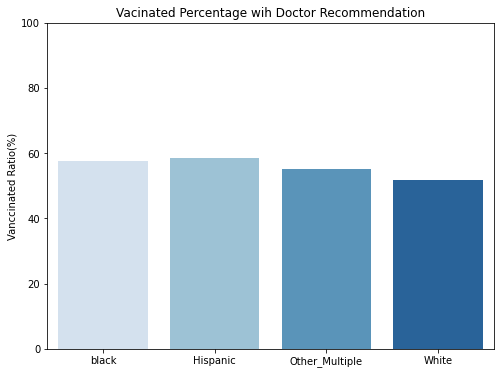

In [50]:
# Plot chart
fig, ax = plt.subplots(figsize=(8,6))
# Create barplot of status group and amount_tsh
sns.barplot(x = ratio_race.index, y = 'Vanccinated Ratio(%)', data=ratio_race, palette="Blues" )
plt.ylim(0, 100)
ax.set_title ('Vacinated Percentage wih Doctor Recommendation')

The gender graph in figure 3 shows that men have more negative attitudes toward vaccination. Although doctor's recommendation influenced them more. In the race plot, black and hispantic have more negative attitudes toward vaccination but they are more welcome to doctors' recomendation.

## Multicollinearity

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a model. It makes it hard to interpret of model and also creates an overfitting problem. The first simple method to check multicollinearity is to plot the correlation matrix of all the independent variables. As can be seen through above graphs, some features have a relatively strong correlation with 'seasonal_vaccine'. It can also be useful to explore the correlation between our features via a seaborn heatmap. A heatmap can help us visualize which features may have a stronger relationship with our target variable. We can create a heatmap of the correlations between features in the dataset with the .heatmap() and the .corr() methods.

<AxesSubplot:>

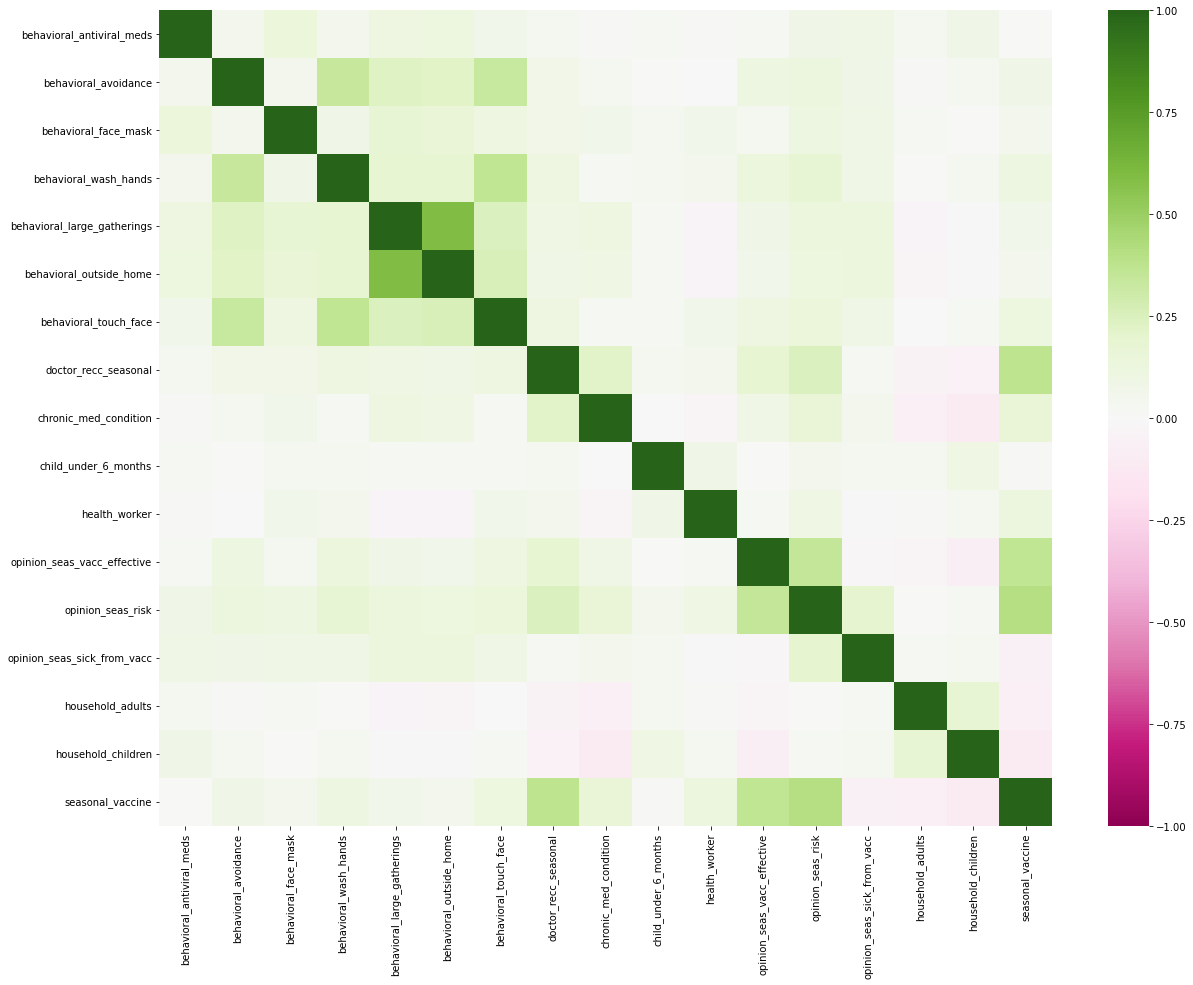

In [51]:
# Set figure size
plt.figure(figsize=(20,15))

# Seaborn heatmap visualization
sns.heatmap(joined_df.corr(), center=0, annot=False, cmap="PiYG", vmin=-1, vmax=1)

<AxesSubplot:>

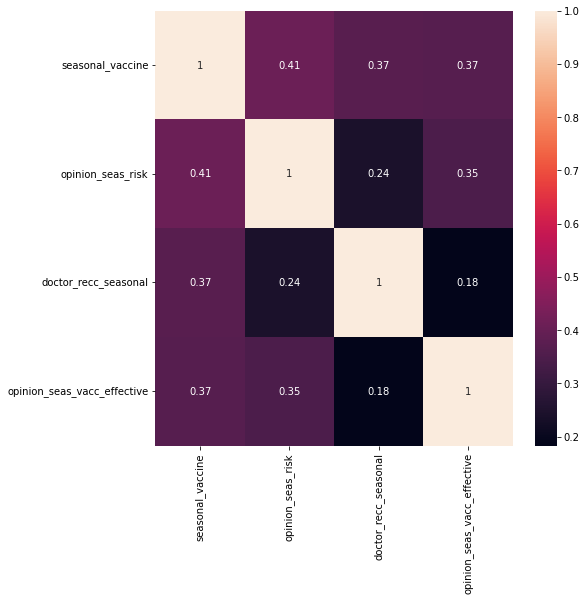

In [52]:
# Set figure size
plt.figure(figsize=(8,8))
# Create a dataframe from our .corr() method
Multicollinearity = joined_df.corr()['seasonal_vaccine'].sort_values(axis=0, ascending=False)

# Gather columns/data that has a correlation value that is statistically significant - we are filtering for anything 0.5+
high_corr = [x for x,corr in Multicollinearity.iteritems() if abs(corr>0.3)]

# Seaborn heatmap visualization
# Here is where the plot is made!
sns.heatmap(joined_df[high_corr].corr(), annot=True)

Generally, a correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation. It seems there is not a high correlation between variables, so there is no need to remove any of them to remove collinear features.

# Baseline Model

EDA of the dataset was performed. Data sets were then checked for multicollinearity, as it affects the interpretability of the model as it affects the statistical significance of the independent variables. Now the base model is built and the final model is evaluated with it.
A baseline model is essentially a simple model that serves as a reference in machine learning projects. A base model was constructed using Sci-kit Learn to classify whether a survey respondent had seasonal flu vaccine or not. For binary classification model logistic regression was selected as baseline model.



In [53]:
# Import libraries

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_validate

from sklearn.metrics import roc_curve, auc, roc_auc_score


The first step is to create the X and y partitions of our data.

In [54]:
# Define X, y
y = joined_df['seasonal_vaccine']
X = joined_df.drop('seasonal_vaccine', axis = 1)

The second step is to split our data into train and test sets by importing `train_test_split` from sklearn. For this model we will use a pretty common 80% train, 20% test ratio.

In [55]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 42)

## Manage Categorical Features

Since machines don't understand categorical features/variables, the third step is to convert categorical columns to numeric columns. 

In [56]:
# Deleaing with categorical features
X_train_categorical = X_train.select_dtypes(exclude=["int64", "float64"]).copy()
X_train_categorical

,age_group,education,race,sex,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
respondent_id,,,,,,,,,
21472,35 - 44 Years,College Graduate,White,Male,Not Married,Own,Employed,lzgpxyit,"MSA, Principle City"
16710,65+ Years,Some College,White,Male,Married,Own,Not in Labor Force,lzgpxyit,"MSA, Principle City"
291,55 - 64 Years,12 Years,White,Male,Not Married,Rent,Not in Labor Force,oxchjgsf,Non-MSA
7525,55 - 64 Years,College Graduate,White,Female,Not Married,Own,Employed,bhuqouqj,"MSA, Not Principle City"
22338,65+ Years,12 Years,White,Female,Married,Own,Not in Labor Force,kbazzjca,"MSA, Principle City"
...,...,...,...,...,...,...,...,...,...
14593,65+ Years,Some College,White,Male,Married,Own,Not in Labor Force,lzgpxyit,Non-MSA
26331,45 - 54 Years,College Graduate,White,Female,Married,Rent,Employed,lzgpxyit,"MSA, Principle City"
6606,65+ Years,12 Years,White,Female,Not Married,Rent,Not in Labor Force,atmpeygn,Non-MSA


In [57]:

from sklearn.preprocessing import OneHotEncoder
import numpy as np

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

ohe.fit(X_train_categorical)
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    # index is important to ensure we can concatenate with other columns
    index=X_train_categorical.index,
    # we are dummying multiple columns at once, so stack the names
    columns=np.hstack(ohe.categories_)
)
X_train_ohe

,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,12 Years,< 12 Years,College Graduate,Some College,Black,Hispanic,Other or Multiple,White,Female,Male,Married,Not Married,Own,Rent,Employed,Not in Labor Force,Unemployed,atmpeygn,bhuqouqj,dqpwygqj,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun,"MSA, Not Principle City","MSA, Principle City",Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21472,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
16710,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
291,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7525,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22338,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
26331,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6606,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Normalization

The purpose of normalization is to transform features so that they have the same scale. This improves model performance and training stability of the model. 

In [58]:
# Normalization
X_train_numeric = X_train.select_dtypes (include = "float64").copy()
X_train_numeric

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,
21472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0
16710,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,2.0,1.0,0.0
291,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,0.0,0.0
7525,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0,2.0,1.0,1.0,0.0
22338,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,5.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,4.0,2.0,1.0,0.0
26331,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0
6606,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,4.0,2.0,0.0,0.0


In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_numeric)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_scaled

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,
21472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.00,0.00,0.000000,0.0
16710,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.75,0.00,0.25,0.333333,0.0
291,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.75,0.25,0.75,0.000000,0.0
7525,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.00,0.25,0.00,0.333333,0.0
22338,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.75,0.00,1.00,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.25,0.75,0.25,0.333333,0.0
26331,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.00,0.25,0.00,0.333333,0.0
6606,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.75,0.75,0.25,0.000000,0.0


To Start fitin a model to our dataset we should concatenate everything together:

In [60]:
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_train_full

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,12 Years,< 12 Years,College Graduate,Some College,Black,Hispanic,Other or Multiple,White,Female,Male,Married,Not Married,Own,Rent,Employed,Not in Labor Force,Unemployed,atmpeygn,bhuqouqj,dqpwygqj,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun,"MSA, Not Principle City","MSA, Principle City",Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.00,0.00,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
16710,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.75,0.00,0.25,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
291,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.75,0.25,0.75,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7525,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.00,0.25,0.00,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22338,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.75,0.00,1.00,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.25,0.75,0.25,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
26331,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.00,0.25,0.00,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6606,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.75,0.75,0.25,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0



## Preprocessing on Test Set

Now let's apply the same preprocessing process to our test set, so we can evaluate the model's performance on unseen data.

In [61]:
# Handling categorical data

X_test_categorical = X_test.select_dtypes(exclude=["int64", "float64"]).copy()
X_test_categorical

X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    index=X_test_categorical.index,
    columns=np.hstack(ohe.categories_))


In [62]:
# Normalization

X_test_numeric = X_test.select_dtypes(include = "float64").copy()
X_test_numeric

X_test_scaled = pd.DataFrame(scaler.transform(X_test_numeric),
                             index=X_test_numeric.index, columns=X_test_numeric.columns)



In [63]:
# Concatenating categorical and numeric data
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_full


,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,12 Years,< 12 Years,College Graduate,Some College,Black,Hispanic,Other or Multiple,White,Female,Male,Married,Not Married,Own,Rent,Employed,Not in Labor Force,Unemployed,atmpeygn,bhuqouqj,dqpwygqj,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun,"MSA, Not Principle City","MSA, Principle City",Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19403,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.00,0.75,1.00,0.333333,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.00,0.333333,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1747,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.25,0.00,0.666667,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,1.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9649,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,0.25,0.25,0.333333,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.75,0.75,0.75,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21787,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.25,1.00,0.333333,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6046,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.00,0.75,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Fitting a Model

After the exploration phase, the next step is modeling phase. Here, we use the cleaned data to train different classification models, compare their evaluation metrics (accuracy,Precision,recall, F1), and select the best performing model. 
Befor starting I check the class distribution. The number of examples belonging to each class is called the class distribution. Imbalanced classification refers to classification predictive modeling problems where the number of examples in the training dataset is imbalanced per class label. 

In [64]:
# Check class distribution
joined_df['seasonal_vaccine'].value_counts(normalize=True)

0    0.521028
1    0.478972
Name: seasonal_vaccine, dtype: float64

A slight imbalance is often not a concern, and the problem can often be treated like a normal classification predictive modeling problem.

Now let's fit the model to the preprocessed training set. In scikit-learn, I do this by first creating an instance of the LogisticRegression class. From there, use the `.fit()` method of the class instance to fit the model to the training data.

In [65]:
# Import libraries
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_logistic = logreg.fit(X_train_full, y_train)
model_logistic

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

## Model Evaluation

After building a predictive classification model, I need to evaluate the performance of the model, that is how good the model is in predicting the outcome of new observations test data that have been not used to train the model.

A confusion matrix is a technique for summarizing the performance of a classification algorithm.  Calculating a confusion matrix can give a better idea of what the classification model is getting right and what types of errors it is making.

In [66]:
# Create predictions on X_test and create an object from predictions
y_preds = model_logistic.predict(X_test_full)

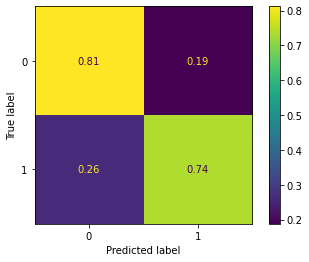

In [67]:
# Import plot_confusion_matrix

from sklearn.metrics import plot_confusion_matrix

# Visualize your confusion matrix
plot_confusion_matrix(model_logistic, X_test_full, y_test, normalize= 'true')
plt.show()

The confusion matrix shows that the Logistic modele accuratly predicted reveving vaccine 74 times out of 100 (true positive), and predicts non receiving vaccine 81 times out os 100 (true negative). These are modest results. The model predicted non reciving vaccine as reciving vaccine (false positive) 19 times out of 100, and predicted reciving vaccine as a non receving vaccine (false negative) 26 times out of 100. 

Now that our logistic regression has successfully used the datasets to train and make predictions, let's evaluate these predictions basesd on the precision and recall. Again in this specific case we are looking for our recall to be larger than precision.
Scikit-learn has a built-in function that will create a Classification Report. This classification report even breaks down performance by individual class predictions for the model. The `classification_report()` function can be found in the sklearn.metrics module, which takes labels and predictions and returns the precision, recall, F1 score and support (number of occurrences of each label in y_true) for the results of a model.

In [68]:
# Import libraries
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report
target_names = ['Non_vaccinated', 'Vaccinated']
print(classification_report(y_test,y_preds,target_names=target_names))
print('model_logistic accuracy:', accuracy_score(y_test,y_preds))

                precision    recall  f1-score   support

Non_vaccinated       0.76      0.81      0.79      2776
    Vaccinated       0.79      0.74      0.76      2693

      accuracy                           0.78      5469
     macro avg       0.78      0.78      0.78      5469
  weighted avg       0.78      0.78      0.78      5469

model_logistic accuracy: 0.7760102395319071


As you can see, our model's accuracy is below 0.8, and I will try other models to improve the accuracy rating.

In [69]:
feature_names=X_train_full.columns.values
feature_names

array(['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', '18 - 34 Years', '35 - 44 Years',
       '45 - 54 Years', '55 - 64 Years', '65+ Years', '12 Years',
       '< 12 Years', 'College Graduate', 'Some College', 'Black',
       'Hispanic', 'Other or Multiple', 'White', 'Female', 'Male',
       'Married', 'Not Married', 'Own', 'Rent', 'Employed',
       'Not in Labor Force', 'Unemployed', 'atmpeygn', 'bhuqouqj',
       'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit',
       'mlyzmhmf', 'oxchjgsf', 'qufhixun', 'MSA, Not Principle  City',
       'MSA, Principle City', 'Non-MSA'], dtyp

In [70]:
new_X_train_full = X_train_full.rename(columns = {'< 12 Years':'youner_12 Years'})

The second model based on the binary dataset is decision trees. To do this I will need to import modules, from scikit learn both for modeling and for evaluation of the models

In [71]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier 

dtree = DecisionTreeClassifier(criterion='entropy', 
                               class_weight='balanced',
                               random_state=10)

In [72]:
# Fit classifier to X_train and y_train
dtree.fit(X_train_full, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=10)

In [73]:
# Create predictions on X_test and create an object from predictions
y_preds = dtree.predict(X_test_full)

Now that our decision tree has successfully used the datasets to train and make predictions, let's evaluate these predictions basesd on the precision and recall. Again in this specific case we are looking for our recall to be larger than precision.

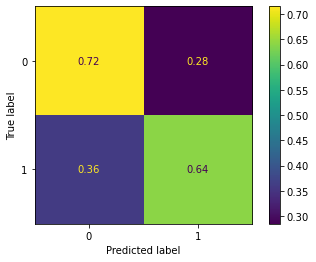

In [74]:
# Visualize your confusion matrix
plot_confusion_matrix(dtree, X_test_full, y_test, normalize= 'true')
plt.show()

The confusion matrix results show an increase in false positives. This is no the direction we want our predictins to move in. 

In [75]:
print(classification_report(y_test,y_preds))
print('model DecisionTree accuracy:', accuracy_score(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      2776
           1       0.69      0.64      0.66      2693

    accuracy                           0.68      5469
   macro avg       0.68      0.68      0.68      5469
weighted avg       0.68      0.68      0.68      5469

model DecisionTree accuracy: 0.6789175351983909


The accuracy of the model decresed too. Sine trying the different models is a time consuming and complez process, using pipline help automate machine learning workflows. 

# Pipeline

 Now it is time to run pipeline to test several models in order to choose the best predictor. I used this pipline from this source [1] For our pipeline, I will test:

- Logistic Regression
- Decision Trees
- K Nearest Neighbors
- Linear Discriminant Analysis
- AdaBoost
- Gradient Boosting
- Random Forest
- Extra Trees

The model which has the highest accuracy of these will be the model which we will choose to perform hyperparameter tuning, and finally make predictions on our original test set. To begin, we will need to import the model modules from Sci-Kit Learn. We will also import plotly to make visualizations on the performance of our models.

[1] https://github.com/MoJoMoon/Assessing-Tanzanian-Waterpoint-Systems-with-Logistic-Regression 

In [76]:
# Instal plotly
pip install plotly==5.11.0

Note: you may need to restart the kernel to use updated packages.


In [77]:
import plotly.graph_objects as go
import plotly.offline  as py
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In order to adequately evaluate the models I will use Stratified K-Fold cross validation to run the models on several samples of the datasets, and obtain the average scores for the predictions. In this case I will set the number of folds to 10, and set our scoring parameter to accuracy.I will use Stratified K-Folds so that the ratio of label variables in the samples equal the ratio of labels in the original dataset.

In [78]:
# Create cv function
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    # Iterate through models in pipeline and apply cross validation
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

I will now create a function which will create a dataframe composed of the accuracy scores of the models. It will take in the names of the models, and the results from the cross-validation and return a pandas dataframe of the various results.

In [79]:
def ScoreDataFrame(names,results):
    scores = []
    for r in results:
        scores.append(r.mean().round(4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Accuracy': scores})
    return scoreDataFrame

Now I will create a function which creates a pipeline that includes all of the models we want to evaluate. We will use a minmax scaler to perform the necessary scaling of our data before being fed into the models. The function will then return the completed pipeline.

In [80]:
# Create function for adding models to pipeline
def GetScaledModel(nameOfScaler):
    
    # Set scaling to minmax
    nameOfScaler = 'minmax'
    scaler = MinMaxScaler()
    
    # Create empty pipelines list
    pipelines = []
    # Append model pipelines to list
    pipelines.append(('Logistic Regression'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression(max_iter=5000))])))
    pipelines.append(('Linear Discriminant Analysis' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append(('K-Nearest Neighbors' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append(('Decision Trees', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append(('Ada Boost'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append(('Gradient Boosting' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append(('Random Forest'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append(('Extra Trees'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

Now I only need to put all of our functions together to run the pipeline and visualize the best model, while producing a dataframe with the appropriate accuracy values.

In [81]:
# Create pipeline object
models = GetScaledModel('minmax')
# Run cv on pipeline
names,results = BasedLine2(X_train_full, y_train,models)

# Create dataframe of results
accuracy = ScoreDataFrame(names,results)
# View results
accuracy

Logistic Regression: 0.781372 (0.008896)
Linear Discriminant Analysis: 0.780702 (0.008433)
K-Nearest Neighbors: 0.687449 (0.008352)
Decision Trees: 0.679101 (0.010686)
Ada Boost: 0.784177 (0.008333)
Gradient Boosting: 0.788321 (0.011397)
Random Forest: 0.777656 (0.008134)
Extra Trees: 0.768878 (0.011951)


,Model,Accuracy
0,Logistic Regression,0.7814
1,Linear Discriminant Analysis,0.7807
2,K-Nearest Neighbors,0.6874
3,Decision Trees,0.6791
4,Ada Boost,0.7842
5,Gradient Boosting,0.7883
6,Random Forest,0.7777
7,Extra Trees,0.7689


I repeat above steps but the scoring parameter was set to Percision.

In [82]:
# Create cv function
def BasedLine3(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10

    results = []
    names = []
    # Iterate through models in pipeline and apply cross validation
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision_weighted')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [83]:
def ScoreDataFrame(names,results):
    scores = []
    for r in results:
        scores.append(r.mean().round(4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Precision': scores})
    return scoreDataFrame

In [84]:
# Create pipeline object
models = GetScaledModel('minmax')
# Run cv on pipeline
names,results = BasedLine2(X_train_full, y_train,models)

# Create dataframe of results
precision = ScoreDataFrame(names,results)
# View results
precision

Logistic Regression: 0.781372 (0.008896)
Linear Discriminant Analysis: 0.780702 (0.008433)
K-Nearest Neighbors: 0.687449 (0.008352)
Decision Trees: 0.677332 (0.007933)
Ada Boost: 0.784177 (0.008333)
Gradient Boosting: 0.788321 (0.011397)
Random Forest: 0.774912 (0.010664)
Extra Trees: 0.770280 (0.011739)


,Model,Precision
0,Logistic Regression,0.7814
1,Linear Discriminant Analysis,0.7807
2,K-Nearest Neighbors,0.6874
3,Decision Trees,0.6773
4,Ada Boost,0.7842
5,Gradient Boosting,0.7883
6,Random Forest,0.7749
7,Extra Trees,0.7703


In [ ]:
I repeat above steps but the scoring parameter was set to Recall.

In [85]:
# Create cv function
def BasedLine3(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10

    results = []
    names = []
    # Iterate through models in pipeline and apply cross validation
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall_weighted')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [86]:
def ScoreDataFrame(names,results):
    scores = []
    for r in results:
        scores.append(r.mean().round(4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Recall': scores})
    return scoreDataFrame

In [87]:
# Create pipeline object
models = GetScaledModel('minmax')
# Run cv on pipeline
names,results = BasedLine2(X_train_full, y_train,models)

# Create dataframe of results
recall = ScoreDataFrame(names,results)
# View results
recall

Logistic Regression: 0.781372 (0.008896)
Linear Discriminant Analysis: 0.780702 (0.008433)
K-Nearest Neighbors: 0.687449 (0.008352)
Decision Trees: 0.676297 (0.008675)
Ada Boost: 0.784177 (0.008333)
Gradient Boosting: 0.788321 (0.011397)
Random Forest: 0.774059 (0.009487)
Extra Trees: 0.768758 (0.010045)


,Model,Recall
0,Logistic Regression,0.7814
1,Linear Discriminant Analysis,0.7807
2,K-Nearest Neighbors,0.6874
3,Decision Trees,0.6763
4,Ada Boost,0.7842
5,Gradient Boosting,0.7883
6,Random Forest,0.7741
7,Extra Trees,0.7688


In [ ]:
I repeat above steps but the scoring parameter was set to F1.

In [88]:
# Create cv function
def BasedLine3(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10

    results = []
    names = []
    # Iterate through models in pipeline and apply cross validation
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_weighted')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [89]:
def ScoreDataFrame(names,results):
    scores = []
    for r in results:
        scores.append(r.mean().round(4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'F1': scores})
    return scoreDataFrame

In [90]:
# Create pipeline object
models = GetScaledModel('minmax')
# Run cv on pipeline
names,results = BasedLine2(X_train_full, y_train,models)

# Create dataframe of results
F1 = ScoreDataFrame(names,results)
# View results
F1

Logistic Regression: 0.781372 (0.008896)
Linear Discriminant Analysis: 0.780702 (0.008433)
K-Nearest Neighbors: 0.687449 (0.008352)
Decision Trees: 0.678185 (0.011059)
Ada Boost: 0.784177 (0.008333)
Gradient Boosting: 0.788321 (0.011397)
Random Forest: 0.776315 (0.010540)
Extra Trees: 0.769854 (0.012951)


,Model,F1
0,Logistic Regression,0.7814
1,Linear Discriminant Analysis,0.7807
2,K-Nearest Neighbors,0.6874
3,Decision Trees,0.6782
4,Ada Boost,0.7842
5,Gradient Boosting,0.7883
6,Random Forest,0.7763
7,Extra Trees,0.7699


Now, Collect all the results in a dataframe to be able to compare the results better.

In [91]:
# Make a dataframe
dfs = [accuracy, precision, recall, F1]
dfs = [df.set_index('Model') for df in dfs]
dfs[0].join(dfs[1:])


,Accuracy,Precision,Recall,F1
Model,,,,
Logistic Regression,0.7814,0.7814,0.7814,0.7814
Linear Discriminant Analysis,0.7807,0.7807,0.7807,0.7807
K-Nearest Neighbors,0.6874,0.6874,0.6874,0.6874
Decision Trees,0.6791,0.6773,0.6763,0.6782
Ada Boost,0.7842,0.7842,0.7842,0.7842
Gradient Boosting,0.7883,0.7883,0.7883,0.7883
Random Forest,0.7777,0.7749,0.7741,0.7763
Extra Trees,0.7689,0.7703,0.7688,0.7699


It can be seen that most of the models had accuracy levels higher than 70%, with the best performing being Gradient Boosting and Ada Boost, two powerful ensemble methods. Since Extreme Gradient Boosting (XGBoost) is a more regularized form of Gradient Boosting. XGBoost uses advanced regularization (L1 & L2), which improves model generalization capabilities. XGBoost delivers high performance as compared to Gradient Boosting. Its training is very fast and can be parallelized across clusters
We will use the XGBoost Classifier for the final predictions of on our test dataset

# Extreme Gradient Boosting (XGBoost)

XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting algorithm.


Let's begin by scaling our data in preparation for the GXboost Model.

In [93]:
# Import libraries
from xgboost import XGBClassifier
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

XGBoost requires that classification categories be integers that count up from 0. So I check the y_train values

In [94]:
y_train.value_counts().sort_index()

0    8622
1    7785
Name: seasonal_vaccine, dtype: int64

In [95]:
# Rename columns names
new_X_train_full = X_train_full.rename(columns = {'< 12 Years':'youner_12 Years'})
new_X_test_full = X_test_full.rename(columns = {'< 12 Years':'youner_12 Years'})

In [96]:
# Instantiate XGBClassifier
clf = XGBClassifier(objective = 'binary:logistic' )

# Fit XGBClassifier
clf.fit(new_X_train_full, y_train, eval_metric='auc')

# Predict on training and test sets
training_preds = clf.predict(new_X_train_full)
test_preds = clf.predict(new_X_test_full)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)*100
test_accuracy = accuracy_score(y_test, test_preds)*100

# Precision of training and test stes
training_precision = precision_score(y_train, training_preds)*100
test_precision = precision_score(y_test, test_preds)*100

# Recall of training and test stes
training_recall = recall_score(y_train, training_preds)*100
test_recall = recall_score(y_test, test_preds)*100

# F1 of training and test stes
training_f1 = f1_score(y_train, training_preds)*100
test_f1 = f1_score(y_test, test_preds)*100

# Calculate area under the curve (logit_roc_auc) of training and test sets
auc_train = roc_auc_score(y_train, clf.predict_proba(new_X_train_full)[:,1]) 
auc_test = roc_auc_score(y_test, clf.predict_proba(new_X_test_full)[:,1])

# Create a dataframe
columns = ['Accuracy(%)', 'Precision(%)', 'Recall(%)', 'F1(%)', 'AUC']
rows = ['Traing set', 'Test set']
data = np.array([[training_accuracy,training_precision,training_recall,training_f1,auc_train],
                [test_accuracy,test_precision,test_recall,test_f1,auc_test]]).round(2)

evaluation_df = pd.DataFrame(data=data, index=rows, columns=columns)
evaluation_df


,Accuracy(%),Precision(%),Recall(%),F1(%),AUC
Traing set,89.03,88.71,88.09,88.4,0.96
Test set,76.21,77.25,73.26,75.2,0.84


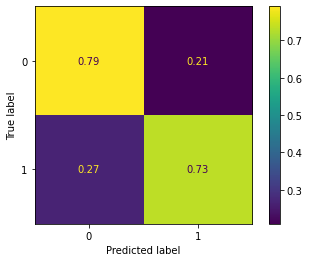

In [97]:
# Plot Confusion matrix
plot_confusion_matrix(clf, new_X_test_full, y_test, normalize= 'true')
plt.show()

The evaluation metrics are improve from the basline model but these metrics results help to perform hyperparameter tuning, and finally make predictions on the original test set

AUC is an alternative comprehensive metric to confusion matrices, and Receiver Operator Characteristic curve (ROC curve) graphs allow us to determine optimal precision-recall tradeoff balances specific to the problem you are looking to solve.
The ROC illustrates the true positive rate (or sensitivity) against the false positive rate (or 1 - specificity) of our classifier. 

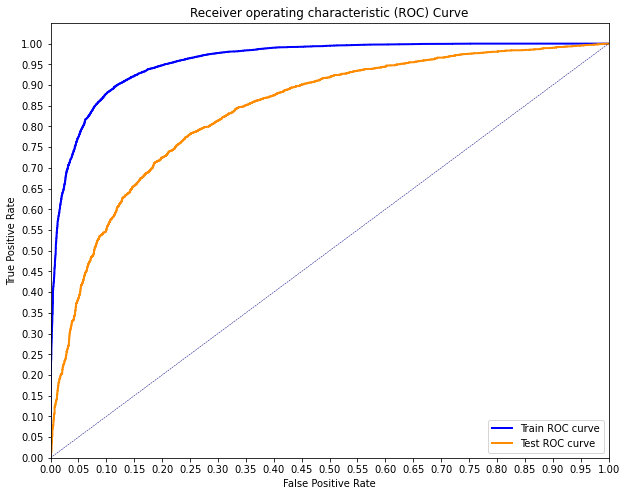

In [98]:
# Plot ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, clf.predict_proba(new_X_train_full)[:,1])
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, clf.predict_proba(new_X_test_full)[:,1])

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The training set should in general fit the data better than the testing set. This is because this set is what your model was built on, so it has already "seen" that data, and fit itself to it. The testing set, by contrast, has not yet been "seen," and because of this should nearly always have a worse fit. 
In order to improve AUC, it is overall to improve the performance of the classifier. Several measures could be taken for experimentation. One of them is tune the parameter through grid search. Grid search is an automatic way to tune your parameter.
Let's explore gradient bossting with a grid search to find optimal hyperparameters for the classifier, hopefully improving the predicting performance of the model. Some of the hyperparameters we will attempt to optimize are:


- learning_rate: This determines the impact of each tree on the final outcome
- max_depth: Max number of levels in each decision tree
- min_child_weight: Defines the minimum sum of weights of all observations required in a child.
- subsample: Denotes the fraction of observations to be randomly samples for each tree.
- n_estimators: the number of runs XGBoost will try to learn


In [108]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1,2],
    'subsample': [0.5, 0.7],
     'n_estimators':[100],    
}

In [109]:
# Exhaustive search over specified parameter values for an estimator.
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(new_X_train_full, y_train,eval_metric='auc')

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(new_X_train_full)
test_preds = grid_clf.predict(new_X_test_full)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Testing Accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 5
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 81.76%
Testing Accuracy: 77.88%


In [111]:
 # Instantiate XGBClassifier
modifided_clf = XGBClassifier(objective = 'binary:logistic', learning_rate= 0.1, max_depth=6, min_child_weight=1,
                              subsample= 0.7, n_estimators =100 )

# Fit XGBClassifier
modifided_clf.fit(new_X_train_full, y_train, eval_metric='auc')

# Predict on training and test sets
training_preds = modifided_clf.predict(new_X_train_full)
test_preds = modifided_clf.predict(new_X_test_full)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)*100
test_accuracy = accuracy_score(y_test, test_preds)*100

# Precision of training and test stes
training_precision = precision_score(y_train, training_preds)*100
test_precision = precision_score(y_test, test_preds)*100

# Recall of training and test stes
training_recall = recall_score(y_train, training_preds)*100
test_recall = recall_score(y_test, test_preds)*100

# F1 of training and test stes
training_f1 = f1_score(y_train, training_preds)*100
test_f1 = f1_score(y_test, test_preds)*100

# Calculate area under the curve (logit_roc_auc) of training and test sets
auc_train = roc_auc_score(y_train, modifided_clf.predict_proba(new_X_train_full)[:,1]) 
auc_test = roc_auc_score(y_test, modifided_clf.predict_proba(new_X_test_full)[:,1])

# Create a dataframe
columns = ['Accuracy(%)', 'Precision(%)', 'Recall(%)', 'F1(%)', 'AUC']
rows = ['Traing set', 'Test set']
data = np.array([[training_accuracy,training_precision,training_recall,training_f1,auc_train],
                [test_accuracy,test_precision,test_recall,test_f1,auc_test]]).round(2)

evaluation_df = pd.DataFrame(data=data, index=rows, columns=columns)
evaluation_df


,Accuracy(%),Precision(%),Recall(%),F1(%),AUC
Traing set,83.37,82.93,81.77,82.35,0.91
Test set,77.40,78.51,74.49,76.45,0.85


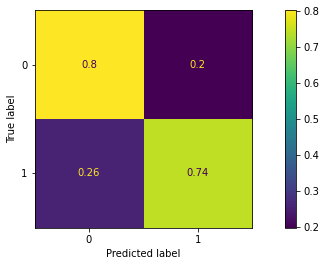

Text(0, 0.5, 'Feature Importance Score')

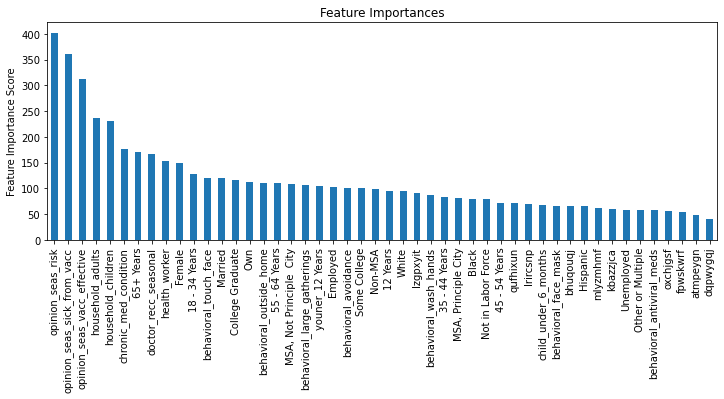

In [167]:
# Plot Confusion matrix
plot_confusion_matrix(modifided_clf, new_X_test_full, y_test, normalize= 'true')
plt.show()
feat_imp = pd.Series(modifided_clf.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

# Conclusion and Recommendation

People's opinions about vaccination are an important predictor of vaccination patterns in societies. Raising public awareness of the benefits of vaccination is key to increasing vaccination coverage. Physician recommendations, on the other hand, can make a big difference in people's attitudes toward vaccination. Below are recommendations that the U.S. Department of Health and Human Services may make to improve vaccination coverage.
- Put more effort into groups that are more likely to be unvaccinated, such as men, blacks and Hispanics.
- Ask doctors for advice about immunizations during the patients' routine check-up.